# Dirichlet Process Mixture Model for the BOMNI Dataset

This script aims to perform action segmentation using DPMM trained with memoroized variational inference method. The DPMM method provides a nice way to derive model parameters and model complexity jointly. The input feature is obtained as follows:

    (1) perform mask-rcnn to derive person masks; for multiple persons, we use the annotated bounding box to select the correct one

    (2) resize the masks to 40X40
    
    (3) distance transform; the result is positive and the middle has the highest value

__1. import necessary libraries__

In [12]:
import bnpy
import numpy as np
import os
import time

from matplotlib import pyplot as plt
import seaborn as sns

__2. define function to visualize segmentation result__

In [17]:
def plot_segmentation(labels):
    plt.plot(labels)
    plt.show()
    

def read_video_list(list_file_path):
    video_file = open(list_file_path,'r')
    video_list = []
    for line in video_file:
        video_list.append(line.strip())
    
    return video_list

__3. run the core part__

3.1 One should note that we need read out the feature vectors from prepared files.

3.2 The bnpy package support reading data from *.mat files.

-- processing: BOMNI_side-0
--- read data
--- train DPMM
--- output results


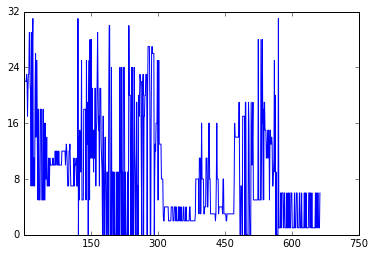

-- processing: BOMNI_side-1
--- read data
--- train DPMM
--- output results


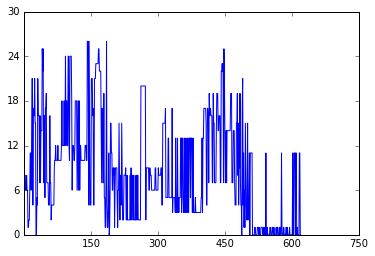

-- processing: BOMNI_side-2
--- read data
--- train DPMM
--- output results


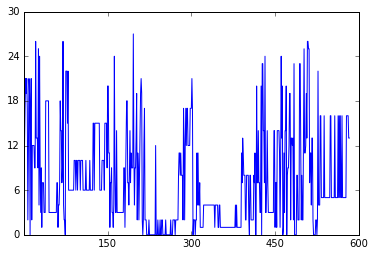

-- processing: BOMNI_side-3
--- read data
--- train DPMM
--- output results


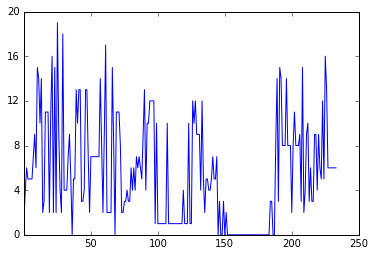

-- processing: BOMNI_side-4
--- read data
--- train DPMM
--- output results


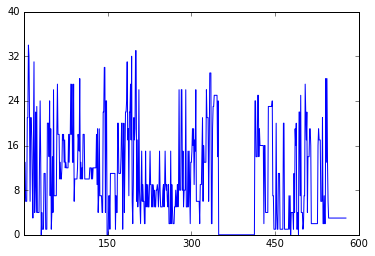

:mean(runtime)=17.1081828117


In [24]:
feature_list = ['dist_mask']
dataset_path = '/home/yzhang/Videos/Dataset_BOMNI/scenario1/features'
result_path = '/home/yzhang/Videos/Dataset_BOMNI/scenario1/SegmentationResults_DPMM'
cpt_time = []
video_list = read_video_list('/home/yzhang/Videos/Dataset_BOMNI/scenario1/video_list2.txt')

for line in video_list:
    print '-- processing: BOMNI_{:s}'.format(line)

    ## read the features from the file
    filename = '{:s}.mat'.format(line)
    print '--- read data'
    dataset = bnpy.data.XData.read_mat(os.path.join(dataset_path, filename))

    ## train DPMM using online algorithm
    print '--- train DPMM'
    time_start = time.time()
    K1_trained_model, K1_info_dict = bnpy.run(
    dataset, 'DPMixtureModel', 'DiagGauss', 'memoVB',
    output_path='/tmp/CUMMAD_DPMM/trymoves-K=1/',
    doWriteStdOut=False,
    nLap=30, nTask=1, nBatch=10,
    sF=0.25, ECovMat='eye',
    K=1, initname='randexamples',
    moves='birth,merge,shuffle',
    m_startLap=5, b_startLap=2, b_Kfresh=4)

    ## measure running time
    eps = time.time()-time_start
    cpt_time = np.append(cpt_time, eps)

    ## assign labels to samples (0-based cluster)
    print '--- output results'
    Q = K1_trained_model.calc_local_params(dataset)['E_log_soft_ev'] # time X dimension, matrix of encoded features
    sample_labels = np.argmax(Q, axis=1)
    plot_segmentation(sample_labels)

    ## save the sample labels to file
    outfile = 'BOMNI_{:s}_DPMM_SampleLabels.txt'.format(line)
    np.savetxt(os.path.join(result_path, outfile), sample_labels)

    ## save the encoded features to file
    outfile2 = 'BOMNI_{:s}_DPMM_SampleEncoding.txt'.format(line)
    np.savetxt(os.path.join(result_path, outfile2), Q)
            
print ':mean(runtime)=' + str(np.mean(cpt_time))

print dataset

In [16]:
print filename

side-0
.mat


['jointLocs', 'relativeAngle', 'quaternions']